# Semantic Factors
This notebook aims for an exploratory factor analysis (EFA) on the "Glasgow Norms" -- a database with 5,553 English words classified into nine psycholinguistics dimensions (SCOTT, 2016).  

This analysis is part of the Ph.D thesis of Tiago B. N. Silveira.  
UTFPR, Brazil. 2023-11.  
  


## References: 
Scott, G. G., Keitel, A., Becirspahic, M., Yao, B., & Sereno, S. C. (2019). The Glasgow Norms: Ratings of 5,500 words on nine scales. Behavior Research Methods, 51(3), 1258–1270. https://doi.org/10.3758/s13428-018-1099-3

## Introduction

### Libraries

In [100]:
## Data analysis packages:
import pandas as pd
import numpy as np
from math import isnan  #Verifies if a given valu e is numerical.

## Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Plotly Express
import plotly.graph_objs as go
import plotly

### Definitions

In [101]:
## Forcing Pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_seq_items = 15000

## DataPrep

### Importing "The Glasgow Norms" dataset
The Glasgow Norms (SCOTT, 2016) are a set of normative ratings for 5,553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

In [128]:
## Reading the dataset file:
glasgow = pd.read_csv('../data/GlasgowR_pandas_ready.csv')
glasgow.set_index('words', inplace=True)
glasgow.head(2)

,length,AROU_M,AROU_SD,AROU_N,VAL_M,VAL_SD,VAL_N,DOM_M,DOM_SD,DOM_N,CNC_M,CNC_SD,CNC_N,IMAG_M,IMAG_SD,IMAG_N,FAM_M,FAM_SD,FAM_N,AOA_M,AOA_SD,AOA_N,SIZE_M,SIZE_SD,SIZE_N,GEND_M,GEND_SD,GEND_N
words,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33


### Selecting data of interest:

In [309]:
## Defining labels of interest (Mean and StdDev for each dimension)
label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_SD']
    

In [310]:
## Creating a copy of the original dataset:
df = glasgow.copy()
df = df[label_M + label_SD]
df.head()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015


----
## Exploratory Data Analysis of psycholinguistics dimensions

#### Correlation between dimensions (based on means)

<Axes: >

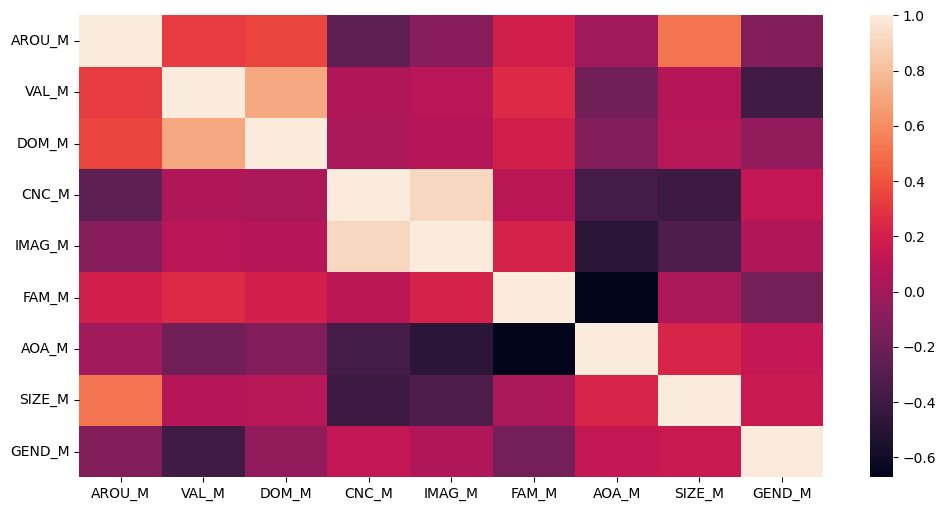

In [311]:
## Plotting the correlation map only for Mean values
plt.figure(figsize=(12,6))
c= df[label_M].corr()
sns.heatmap(c)

### Visualizing features with confidence interval:

In [312]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf

In [313]:
def viz_GlasgowR(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

#### Experimenting some words visualization:

In [314]:
## Comparing elephant (High SIZE) and worm (Low SIZE)
fig_ex = viz_GlasgowR(['elephant','worm'], df)
fig_ex

---
### Scaling data for VAL and DOM attributes
Analyzing the nine psycholinguistic variables that make up the Glasgow Norms, it is observed that the attributes VAL and DOM measure dimensions whose extremes represent a quantity of opposite magnitude so that the neutrality of this dimension is found in a central position.

The CNC dimension for concreteness, for example: at its minimum value, means the absence of concreteness, while at its maximum value, the highest concretude. On the other hand, in the VAL variable, the positive or negative valence is found at the maximum and minimum values, respectively, but with neutrality centered.

For the factor analysis that we wish to employ, there is greater theoretical consistency if we consider the absence or absence of emotional valence, regardless of whether it is positive or negative. Therefore, for these two dimensions (VAL and DOM), we will standardize their values based on the average value of the Lickert scale used -- in the case of 9 points, we will consider the average as value 5. To do so, we will employ a specific scaler:

*Simple Customized scaler for 9-points Lickert scale:*  

$y_{\text{simple}} = (x-5)^2$

In [315]:
def simple_custom_NinePoints_Scaler(serie: pd.Series, central_val: float = 5):
    y = (serie - central_val)**2
    return y

*Smooth Customized scaler for 9-points Lickert scale:*  

$y_{\text{smooth}} = \log(1+\epsilon(x-5)^4)$,  
where $\epsilon$ is the smoothness parameter varying from 1.0 to 10,000.

In [321]:
def smooth_custom_NinePoints_Scaler(serie: pd.Series, central_val: float = 5., smoothParameter: float = 1.):
    y = np.log(1 + smoothParameter*(serie - central_val)**4)
    return y

In [325]:
## Experimenting with the custom scaler:    
ex_smooth = smooth_custom_NinePoints_Scaler(pd.Series(data=[1,2,3,4,5,6,7,8,9], index=[1,2,3,4,5,6,7,8,9]), 5., 10.)
ex_simple = simple_custom_NinePoints_Scaler(pd.Series(data=[1,2,3,4,5,6,7,8,9], index=[1,2,3,4,5,6,7,8,9]), 5.)
pd.DataFrame({'smooth': ex_smooth, 'simple': ex_simple})

,smooth,simple
1,7.848153,16.0
2,6.698268,9.0
3,5.081404,4.0
4,2.397895,1.0
5,0.000000,0.0
6,2.397895,1.0
7,5.081404,4.0
8,6.698268,9.0
9,7.848153,16.0


#### Applying the customized scaler for VAL and DOM dimensions:

In [326]:
## Applying the SIMPLE custom scaler to VAL and DOM dimensions:
#df['VAL_M'] = simple_custom_NinePoints_Scaler(df['VAL_M'], 5.0)
#df['DOM_M'] = simple_custom_NinePoints_Scaler(df['DOM_M'], 5.0)

In [327]:
## Applying the SMOOTH custom scaler to VAL and DOM dimensions:
df['VAL_M'] = smooth_custom_NinePoints_Scaler(df['VAL_M'], 5.0, 10.)
df['DOM_M'] = smooth_custom_NinePoints_Scaler(df['DOM_M'], 5.0, 10.)

In [328]:
## Comparing elephant (High SIZE) and worm (Low SIZE)
fig_ex2 = viz_GlasgowR(['elephant','worm'], df)
fig_ex2

----
# Exploratory Factor Analysis

In [329]:
from factor_analyzer import FactorAnalyzer

### Adjusting the data for analysis (df_M)
We will apply a factor analysis only to the means, i.e., we will  not consider the standard deviation for each psycholinguistic dimension since variance is determined by factory analysis.

In [330]:
df_M = df[label_M]
df_M.head()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,4.200,5.343117,1.091676,5.455,4.391,2.382,6.760,4.652,5.391
abbey,3.125,1.551920,0.115971,5.906,5.344,3.324,5.177,5.121,3.303
abbreviate,3.273,0.038319,0.030042,3.286,3.177,5.121,5.543,2.667,3.971
abdicate,4.194,3.182742,0.760560,3.367,2.516,3.971,6.233,4.679,5.167
abdication,3.846,2.817514,0.015873,3.292,2.571,3.097,6.407,5.083,4.571


#### Applying a Standard Scaler to data:

In [331]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [332]:
scaler = StandardScaler()

scaled_df_M=df_M.copy()
scaled_df_M=pd.DataFrame(scaler.fit_transform(scaled_df_M),
                         columns=df_M.columns,
                         index=df_M.index)
scaled_df_M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, abattoir to zoology
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AROU_M  5553 non-null   float64
 1   VAL_M   5553 non-null   float64
 2   DOM_M   5553 non-null   float64
 3   CNC_M   5553 non-null   float64
 4   IMAG_M  5553 non-null   float64
 5   FAM_M   5553 non-null   float64
 6   AOA_M   5553 non-null   float64
 7   SIZE_M  5553 non-null   float64
 8   GEND_M  5553 non-null   float64
dtypes: float64(9)
memory usage: 562.9+ KB


In [333]:
## Observing samples from scaled data:
scaled_df_M.head()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,-0.389836,1.085525,-0.188695,0.573640,-0.294028,-3.102087,2.113254,0.552909,1.391401
abbey,-1.370862,-0.484927,-0.775110,0.892080,0.412861,-2.085543,0.838995,1.012206,-0.901101
abbreviate,-1.235799,-1.111916,-0.826755,-0.957837,-1.194514,-0.146339,1.133612,-1.391025,-0.167676
abdicate,-0.395312,0.190619,-0.387701,-0.900645,-1.684811,-1.387343,1.689038,0.579350,1.145462
abdication,-0.712890,0.039328,-0.835271,-0.953601,-1.644015,-2.330506,1.829102,0.974992,0.491089


### Checking adequacy for EFA
Reference:  
(TOTH, 2023): TOTH, Gellert. DataSklr. Blog available in "https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis". Accessed in 2023.

In [334]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


> ``Bartlett Sphericity  Test is a check of intercorrelation between manifest variables, which means the comparison of the observed correlation matrix and the identity matrix.  If factor analysis is an appropriate method to use, the correlation matrix and the identity matrix will not be the same, and the test will be significant. Luckily, the Bartlett Sphericity Test based on [our] data produced a significant p-value of 0.0.'' (TOTH, 2023)

In [335]:
#CHECKING ADEQUACY - Bartlett Sphericity Test
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df_M)
print('Chi Square Value: ',chi_square_value,'\np-value: ', p_value)

Chi Square Value:  24451.097565048534 
p-value:  0.0


> ``The KMO test (Kaiser-Meyer-Olkin) should test whether it is appropriate to use the manifest variables for factor analysis. The test involves the computation of the proportion of variance among the manifest variables.  The KMO values range between 0-1 and a proportion under 0.6 would suggest that the dataset is inappropriate for factor analysis.'' (TOTH, 2023)

In [336]:
#CHECKING ADEQUACY - KMO
#Value should be > 0.6
kmo_all,kmo_model=calculate_kmo(scaled_df_M)
print(f'KMO value: {kmo_model:2.2}')

KMO value: 0.65


### EFA Estimator

In [337]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()

## fa.fit(df_M)
fa.fit(scaled_df_M)


FactorAnalyzer(rotation_kwargs={})

In [338]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([3.10778024, 2.0276582 , 1.17836171, 0.82730537, 0.74515084,
       0.41976259, 0.36888465, 0.25858271, 0.0665137 ])

#### Scree Plot
Factors with eigenvalue $\leq 1$ are no more informative than a single variable. They bring equal or less information than a single variable alone.

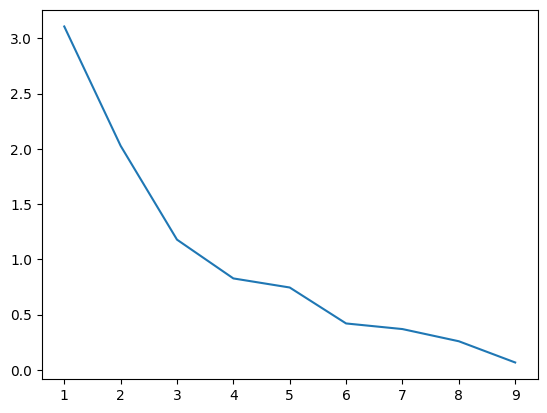

In [339]:
plt.plot(range(1,scaled_df_M.shape[1]+1),ev)

#### Choosing three factors and analyzing their structure:
- We choose a configuration of 3 factors, based on the scree plot above, and the olbique rotation "oblimin", since we assume the dimensions are not orthogonal, i.e., they are not independent.  
    - According to (TOTH, 2023): ``Oblimin: Attempts a simple factor pattern matrix structure by using a parameter that controls the degree of correlation among factors. Finds the best structure while minimizing a.) power loadings and b.) the correlation between factors. Analysts can set the magnitude of the correlation between the factors.''

In [340]:
fa = FactorAnalyzer(3, rotation='oblimin')
fa.fit(scaled_df_M)
loads = fa.loadings_
print(loads)

[[ 0.08524174  0.74214832 -0.04680438]
 [-0.06416198  0.70960313 -0.05464663]
 [-0.11429763  0.52141446 -0.02211104]
 [ 0.98396404 -0.07448865  0.06181057]
 [ 0.92865138  0.07853723 -0.0951377 ]
 [-0.06789846  0.13300329 -0.77948844]
 [-0.08611885  0.09802887  0.8691247 ]
 [-0.0294896   0.64803592  0.18322362]
 [ 0.22412267  0.07170502  0.2959913 ]]


#### Analyzing the factor structure:

In [341]:
def highlight_high_values(val, th=0.5):
    ''' Highlights values higher or lower than 0.5. Must be applied as a map in a Pandas.DataFrame style.
    '''
    # color = 'background-color: yellow' if ((val > th) or (val < -th)) else ''
    if (val > th):
        color = 'background-color: yellow' 
    elif (val < -th):
        color = 'background-color: red'
    else:
        color = ''
    return color

In [342]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2','Factor 3'], index=[scaled_df_M.columns])

In [343]:
factors.style.map(highlight_high_values, th=0.5)

,Factor 1,Factor 2,Factor 3
AROU_M,0.085242,0.742148,-0.046804
VAL_M,-0.064162,0.709603,-0.054647
DOM_M,-0.114298,0.521414,-0.022111
CNC_M,0.983964,-0.074489,0.061811
IMAG_M,0.928651,0.078537,-0.095138
FAM_M,-0.067898,0.133003,-0.779488
AOA_M,-0.086119,0.098029,0.869125
SIZE_M,-0.029490,0.648036,0.183224
GEND_M,0.224123,0.071705,0.295991


#### Discussion regarding Factor Analysis:
- As expected, it seems **Factor 1** may relate to objectivity:  
    > It is strongly related to concreteness; and  
    > It is strongly related to imageability, i.e., how ones can easily imagine or picture a given concept.

- **Factor 2**, on the other hand, seems to relate to subjectivity, strongly influenced by arousal, valence, and dominance. It is also related so semantic size.  

- A third factor emerges from these data, **Factor 3**, mostly negativaly related to familiarity and influenced by age of acquisition. This factor can be theoretically associated to context.

In [344]:
## Based on the previous discussing, we name these factors as:
factors_name = ['F_Objectivity','F_Subjectivity','F_Context']

---
#### Calculating Factor Variance:

In [345]:
## Calculating the SumSquared Loading (variance):
variance_metrics = fa.get_factor_variance()

pd.DataFrame(variance_metrics, columns=factors_name, index=['SumSquared Loadings','Proportional Var','Cumulative Var'])

,F_Objectivity,F_Subjectivity,F_Context
SumSquared Loadings,1.918153,1.790302,1.502699
Proportional Var,0.213128,0.198922,0.166967
Cumulative Var,0.213128,0.412051,0.579017


> The "Cumulative Variance" above indicates that ~58% of the variance of the data is explained by these three factors.

#### Getting communalities  
References:  
- [A] https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis/  
- [B] https://medium.com/analytics-vidhya/the-factor-analysis-for-constructing-a-composite-index-2496686fc54c

``From the commonality column, we can know how much variance is explained by the first factor out of the total variance.'' [A]  

``Communality is the proportion of each variable's variance that can be explained by the factors.'' [B]

In [346]:
df_communalities = pd.DataFrame(data = {'Column': scaled_df_M.columns, 'Communality': fa.get_communalities()})
df_communalities.style.map(highlight_high_values, subset = ['Communality'])

,Column,Communality
0,AROU_M,0.560241
1,VAL_M,0.510640
2,DOM_M,0.285426
3,CNC_M,0.977554
4,IMAG_M,0.877613
5,FAM_M,0.629902
6,AOA_M,0.772404
7,SIZE_M,0.454391
8,GEND_M,0.142983


---
### Creating the latent variables:

In [353]:
scores = pd.DataFrame(fa.transform(scaled_df_M), columns=factors_name, index=scaled_df_M.index)
scores.head()

,F_Objectivity,F_Subjectivity,F_Context
words,,,
abattoir,0.399493,-0.076587,2.442473
abbey,0.881684,-0.851838,1.256724
abbreviate,-1.163102,-1.068703,0.893167
abdicate,-1.076237,-0.069555,1.764620
abdication,-1.092416,-0.276661,2.109365


In [354]:
scores.describe()

,F_Objectivity,F_Subjectivity,F_Context
count,5.553000e+03,5.553000e+03,5.553000e+03
mean,5.630088e-17,1.023652e-17,2.303218e-17
std,9.981344e-01,8.958607e-01,9.284028e-01
min,-2.190823e+00,-1.930531e+00,-2.316116e+00
25%,-9.033657e-01,-7.226275e-01,-7.149052e-01
50%,-1.934407e-02,-1.045778e-01,-7.942419e-03
75%,9.531218e-01,6.482976e-01,6.873792e-01
max,1.795186e+00,2.805122e+00,2.698439e+00


In [355]:
## Exemplifying with a trial word:
scores.loc['dog']

F_Objectivity     1.658400
F_Subjectivity    0.636694
F_Context        -1.926734
Name: dog, dtype: float64

In [356]:
# Module for standardization
from sklearn.preprocessing import MinMaxScaler

In [357]:

# Standardize the factors
scaler = MinMaxScaler()
df_factors_scaled = pd.DataFrame(data = scaler.fit_transform(scores),
                                 index = scores.index,
                                 columns = factors_name)

In [360]:
df_factors_scaled.describe()

,F_Objectivity,F_Subjectivity,F_Context
count,5553.000000,5553.000000,5553.000000
mean,0.549628,0.407659,0.461879
std,0.250409,0.189174,0.185142
min,0.000000,0.000000,0.000000
25%,0.322994,0.255066,0.319313
50%,0.544775,0.385576,0.460295
75%,0.788745,0.544556,0.598955
max,1.000000,1.000000,1.000000


In [361]:
scores = df_factors_scaled.copy()

## Evaluating factor distributions:

In [362]:
scores

,F_Objectivity,F_Subjectivity,F_Context
words,,,
abattoir,0.649852,0.391486,0.948955
abbey,0.770823,0.227781,0.712494
abbreviate,0.257832,0.181987,0.639993
abdicate,0.279625,0.392971,0.813778
abdication,0.275566,0.349238,0.882527
...,...,...,...
zeppelin,0.834144,0.407305,0.806014
zero,0.194447,0.288350,0.216518
zest,0.489724,0.455757,0.641775


### Word analysis

In [363]:
factors.style.map(highlight_high_values, th=0.4)

,Factor 1,Factor 2,Factor 3
AROU_M,0.085242,0.742148,-0.046804
VAL_M,-0.064162,0.709603,-0.054647
DOM_M,-0.114298,0.521414,-0.022111
CNC_M,0.983964,-0.074489,0.061811
IMAG_M,0.928651,0.078537,-0.095138
FAM_M,-0.067898,0.133003,-0.779488
AOA_M,-0.086119,0.098029,0.869125
SIZE_M,-0.029490,0.648036,0.183224
GEND_M,0.224123,0.071705,0.295991


In [364]:
viz_GlasgowR(['hate'], df)

In [365]:
scores.loc['fire']

F_Objectivity     0.904519
F_Subjectivity    0.597542
F_Context         0.172573
Name: fire, dtype: float64

### Testes com as palavras após normalização de Valência e Dominância

In [366]:
factors.style.applymap(highlight_high_values, th=0.4)

C:\Users\tiago\AppData\Local\Temp\ipykernel_16008\1062230875.py:1: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Factor 1,Factor 2,Factor 3
AROU_M,0.085242,0.742148,-0.046804
VAL_M,-0.064162,0.709603,-0.054647
DOM_M,-0.114298,0.521414,-0.022111
CNC_M,0.983964,-0.074489,0.061811
IMAG_M,0.928651,0.078537,-0.095138
FAM_M,-0.067898,0.133003,-0.779488
AOA_M,-0.086119,0.098029,0.869125
SIZE_M,-0.029490,0.648036,0.183224
GEND_M,0.224123,0.071705,0.295991


In [367]:
word = 'suffering'

In [377]:
plot_word(word)
scores.loc[word]

NameError: name 'plot_word' is not defined

----
### Scaling the factor loads:

In [257]:
from sklearn.preprocessing import MinMaxScaler

In [263]:
# Inicialize o MinMaxScaler
scaler = MinMaxScaler()

# Ajuste e transforme as cargas fatoriais
score_scaled = scaler.fit_transform(scores)

# Crie um novo DataFrame com as cargas fatoriais redimensionadas
score_scaled_df = pd.DataFrame(score_scaled, columns=['F_Objectivity', 'F_Subjectivity', 'F_Context'], index=scores.index)

In [264]:

# Exiba o novo DataFrame
print(score_scaled_df)

            F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir         0.653963        0.346964   1.000000
abbey            0.695067        0.223116   0.765943
abbreviate       0.181146        0.110793   0.513841
abdicate         0.275942        0.284823   0.739119
abdication       0.269912        0.260918   0.812909
...                   ...             ...        ...
zeppelin         0.816208        0.408081   0.883392
zero             0.098637        0.146835   0.097412
zest             0.451479        0.283986   0.632985
zoo              0.786118        0.400954   0.325238
zoology          0.450084        0.269505   0.680909

[5553 rows x 3 columns]


In [390]:
def plot_semantics(word, scores=scores):
    # Create a scatter plot for all points
    plt.scatter(scores['F_Objectivity'], scores['F_Subjectivity'], label='All words')

    # Add horizontal and vertical lines at 0
    plt.axhline(0.5, color='black', linestyle='--', linewidth=1)
    plt.axvline(0.5, color='black', linestyle='--', linewidth=1)

    try:
        # Highlight the specific point
        highlight_x = scores.loc[word, 'F_Objectivity']
        highlight_y = scores.loc[word, 'F_Subjectivity']
        plt.scatter(highlight_x, highlight_y, color='red', label=f'{word}')

        print(scores.loc[word])

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: {word} is not scored.')

    # Add labels and legend
    plt.xlabel('F_Objectivity')
    plt.ylabel('F_Subjectivity')
    plt.legend()

    # Show the plot
    plt.show()


In [388]:
scores.describe()

,F_Objectivity,F_Subjectivity,F_Context
count,5553.000000,5553.000000,5553.000000
mean,0.549628,0.407659,0.461879
std,0.250409,0.189174,0.185142
min,0.000000,0.000000,0.000000
25%,0.322994,0.255066,0.319313
50%,0.544775,0.385576,0.460295
75%,0.788745,0.544556,0.598955
max,1.000000,1.000000,1.000000


F_Objectivity     0.942464
F_Subjectivity    0.499251
F_Context         0.070721
Name: water, dtype: float64


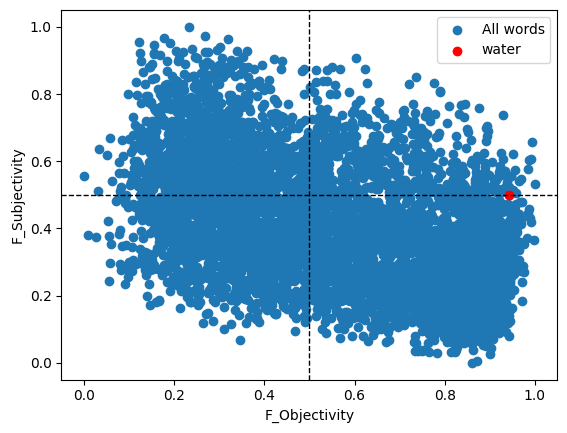

In [392]:
word = 'water'

plot_semantics(word, scores=scores)
#scores.loc[word]

In [152]:
viz_GlasgowR([word], new_df)

In [153]:
viz_GlasgowR([word], df)

In [154]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, abattoir to zoology
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   F_Objectivity   5553 non-null   float64
 1   F_Subjectivity  5553 non-null   float64
 2   F_Context       5553 non-null   float64
 3   Cluster         5553 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 324.3+ KB


In [155]:
scores.describe()

,F_Objectivity,F_Subjectivity,F_Context,Cluster
count,5.553000e+03,5.553000e+03,5.553000e+03,5553.000000
mean,-3.518805e-16,5.118262e-18,-2.571927e-16,0.985413
std,9.808877e-01,8.654898e-01,9.081210e-01,0.800961
min,-2.363638e+00,-1.683598e+00,-2.482114e+00,0.000000
25%,-8.556189e-01,-6.537203e-01,-6.755254e-01,0.000000
50%,1.098310e-03,-1.632170e-01,-3.615042e-02,1.000000
75%,9.010905e-01,5.035975e-01,6.441763e-01,2.000000
max,2.283602e+00,3.283163e+00,2.919345e+00,2.000000


In [138]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [139]:
# Assuming the DataFrame is loaded as 'scores'
# Standardize the data (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(scores)

# Choose the number of clusters (you can adjust this)
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to your DataFrame
scores['Cluster'] = kmeans.labels_

c:\Users\tiago\OneDrive - UNIVALI\PhD\atividades de pesquisa\semantic_factors\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [140]:
import plotly.express as px

In [141]:
# Create a 3D scatter plot for visualization
fig = px.scatter(scores, x='F_Objectivity', y='F_Subjectivity', color='Cluster',
                     title='Clustering Results in 2D', hover_name=scores.index)

# Customize the visualization
fig.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=1000, height=800)

fig.show()

In [ ]:
scores.head(2)

,F_Objectivity,F_Subjectivity,F_Context,Cluster
words,,,,
abattoir,0.932546,-1.094743,-2.723893,0
abbey,1.215183,0.128420,-1.653890,0


In [190]:
# Create a 3D scatter plot for visualization
fig = px.scatter_3d(scores, x='F_Objectivity', y='F_Subjectivity', z='F_Context', color='Cluster',
                     title='Clustering Results in 3D')

# Customize the visualization
fig.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=1000, height=800)

fig.show()

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already defined
# df = ...

# Select the columns for the scatter plot
x_column = 'F_Objectivity'
y_column = 'F_Subjectivity'


In [163]:
# Specify the index of the specific point you want to highlight
highlight_index = 'coin'


In [213]:
def plot_word(word):
    # Create a scatter plot for all points
    plt.scatter(scores[x_column], scores[y_column], label='All words')

    # Add horizontal and vertical lines at 0
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)

    try:
        # Highlight the specific point
        highlight_x = scores.loc[word, x_column]
        highlight_y = scores.loc[word, y_column]
        plt.scatter(highlight_x, highlight_y, color='red', label=f'{word}')

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: {word} is not scored.')

    # Add labels and legend
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()

    # Show the plot
    plt.show()


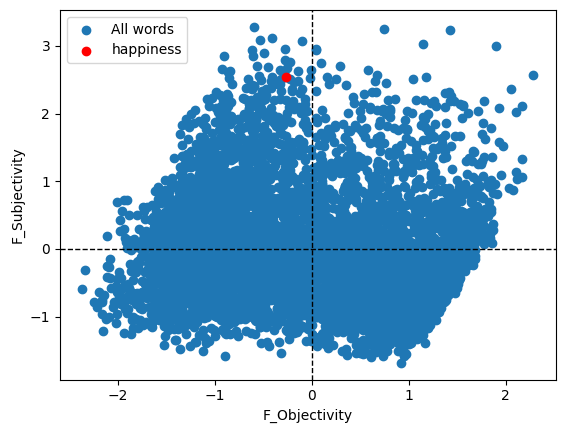

In [228]:
plot_word('happiness')